In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [3]:
data1 = pd.read_csv("/content/Titanic_train.csv")
data2 = pd.read_csv("/content/Titanic_test.csv")

In [4]:
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data1.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
print(data1.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [9]:
def preprocess_data(df):
    # Handling Missing Values
    imputer = KNNImputer(n_neighbors=5)
    df["Age"] = imputer.fit_transform(df[["Age"]])
    df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
    df.drop(columns=["Cabin"], inplace=True)

    # Encode Categorical Variables
    df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})
    df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

    return df
# Preprocess Data
data1 = preprocess_data(data1)


<ipython-input-9-64c880f6907a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


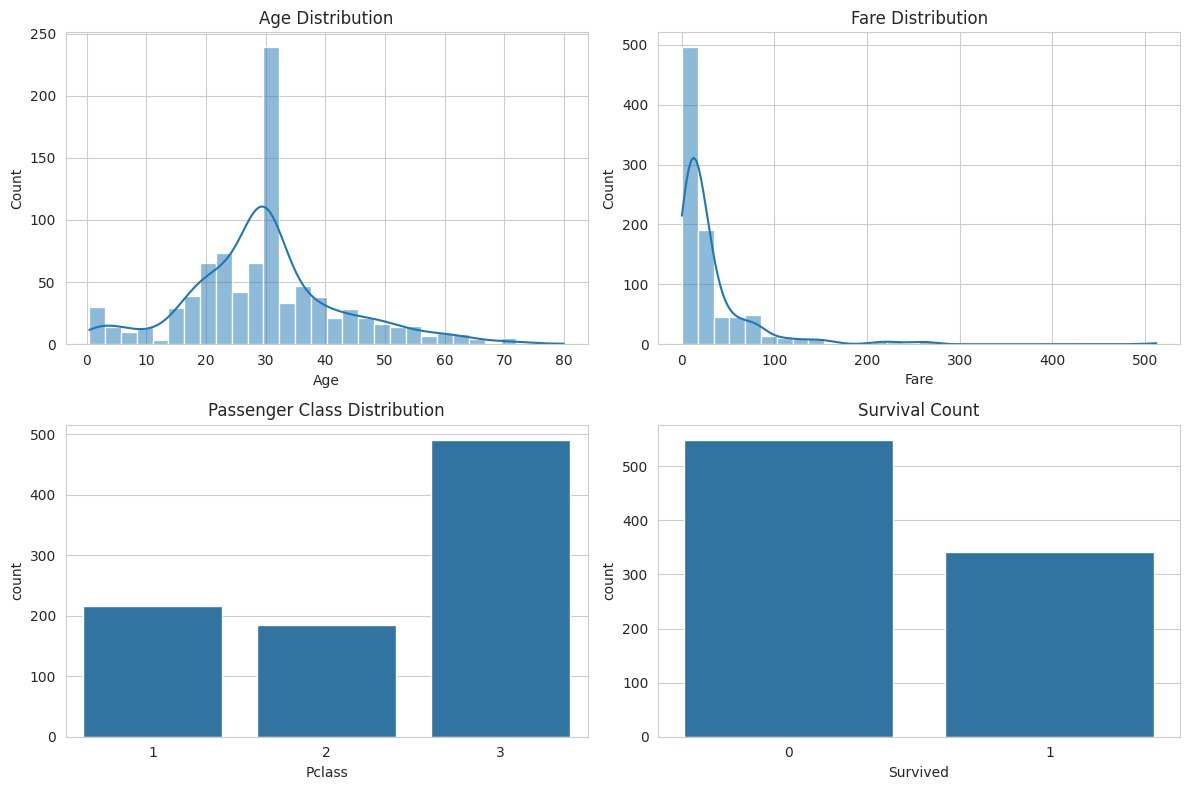

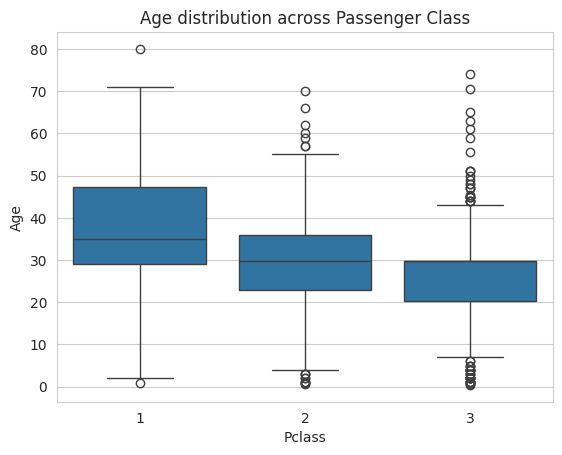

In [10]:
# Visualizations
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(data1["Age"].dropna(), bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution")

sns.histplot(data1["Fare"], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Fare Distribution")

sns.countplot(x="Pclass", data=data1, ax=axes[1, 0])
axes[1, 0].set_title("Passenger Class Distribution")

sns.countplot(x="Survived", data=data1, ax=axes[1, 1])
axes[1, 1].set_title("Survival Count")

plt.tight_layout()
plt.show()

sns.boxplot(x='Pclass', y='Age', data=data1)
plt.title("Age distribution across Passenger Class")
plt.show()

Original Lower Bound: 2.5
Original Upper Bound: 54.5
Outliers below original lower bound: 0
Outliers above original upper bound: 0
count    891.000000
mean      29.376817
std       12.062035
min        2.500000
25%       22.000000
50%       29.699118
75%       35.000000
max       54.500000
Name: Age, dtype: float64


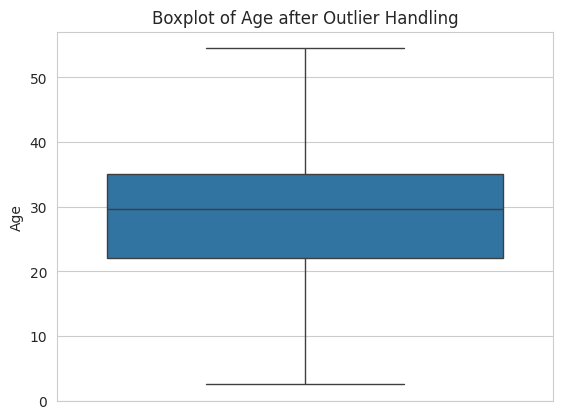

Min Age after handling: 2.5
Max Age after handling: 54.5


In [12]:
# Handling Outliers
# Step 1: Calculate original IQR and bounds
Q1 = data1["Age"].quantile(0.25)
Q3 = data1["Age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Original Lower Bound: {lower_bound}")
print(f"Original Upper Bound: {upper_bound}")

# Step 2: Winsorizing (capping the outliers)
data1["Age"] = np.where(data1["Age"] < lower_bound, lower_bound, data1["Age"])
data1["Age"] = np.where(data1["Age"] > upper_bound, upper_bound, data1["Age"])

# Step 3: Check for any values still outside the original bounds
outliers_below = data1[data1["Age"] < lower_bound]
outliers_above = data1[data1["Age"] > upper_bound]

print("Outliers below original lower bound:", len(outliers_below))
print("Outliers above original upper bound:", len(outliers_above))

# Step 4: Display summary statistics
print(data1["Age"].describe())

# Step 5: Visual check using a boxplot
sns.boxplot(data1["Age"])
plt.title("Boxplot of Age after Outlier Handling")
plt.show()

# Step 6: Confirm boundaries visually
print("Min Age after handling:", data1["Age"].min())
print("Max Age after handling:", data1["Age"].max())


In [13]:
# Define Features and Target Variable
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = data1[features]
y = data1["Survived"]

In [14]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.2, random_state=42)


In [15]:
# Build and Train Logistic Regression Model
model = LogisticRegression()
cv_scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression()

In [ ]:
# Standardization:process transforms the data so that each feature has a mean of 0 and a standard deviation of 1

In [16]:
# Standardize Features
scaler = StandardScaler()
X_train[["Age", "Fare"]] = scaler.fit_transform(X_train[["Age", "Fare"]])
X_test[["Age", "Fare"]] = scaler.transform(X_test[["Age", "Fare"]])


In [17]:
# Save Model and Scaler
with open("logistic_regression_model.pkl", "wb") as file:
    pickle.dump(model, file)
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

In [18]:
# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

Confusion matrix : 
 [[65  9]
 [33 72]]
Outcome values : 
 65 9 33 72
Accuracy: 0.7654
Precision: 0.6633
Recall: 0.8784
F1 Score: 0.7558
ROC-AUC Score: 0.8530
Specificity: 0.8784
MCC: 0.5581
Balanced Accuracy: 0.7820


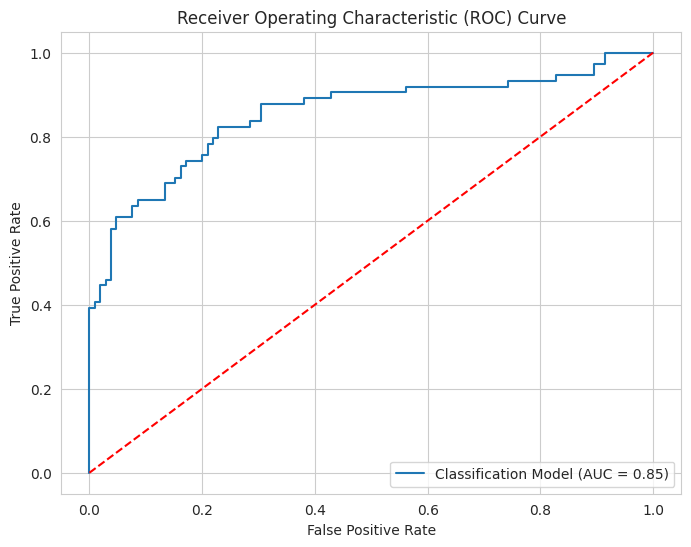

Feature Coefficients:
Pclass: -0.9229
Sex: 2.6405
Age: -0.0364
SibSp: -0.3378
Parch: -0.0824
Fare: 0.0029
Embarked: 0.1359


In [19]:
from math import sqrt
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix

# confusion matrix
actual = y_test
predicted = y_pred
matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Model Evaluation
mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
tp, fn, fp, tn = conf_matrix.ravel()
specificity = tn / (tn + fp)
MCC = matthews_corrcoef(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"MCC: {MCC:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Classification Model (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.savefig('Log_ROC.png')
plt.show()

# Store Results
EMResults = pd.DataFrame()
new_row = {
    'Model Name': 'Logistic Regression',
    'True_Positive': tp,
    'False_Negative': fn,
    'False_Positive': fp,
    'True_Negative': tn,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Specificity': specificity,
    'MCC': MCC,
    'ROC_AUC_Score': roc_auc,
    'Balanced Accuracy': balanced_accuracy
}
print("Feature Coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")


## INTERVIEW QUESTIONS

1. What is the difference between precision and recall?
2. What is cross-validation, and why is it important in binary classification?

Answers:-

1A) Precision measures the proportion of correctly predicted positive cases out of all cases predicted as positive. In other words, it tells us how many of the predicted positives were actually correct.

Recall measures the proportion of correctly predicted positive cases out of all actual positive cases in the dataset. It indicates how well the model is able to capture all relevant positive instances. Recall becomes crucial when missing positive cases has a high cost, like in medical diagnosis





2A) Cross-validation is a robust model evaluation technique that helps assess how well a machine learning model generalizes to new, unseen data. The most common form is k-fold cross-validation, where the dataset is divided into k equal-sized folds. The model is trained on k-1 folds and tested on the remaining fold, repeating this process k times so that each fold serves as the test set once.

In binary classification, cross-validation plays a critical role in preventing overfitting, particularly when the dataset is small or imbalanced. A single train-test split might not accurately reflect the model’s ability to identify minority class instances, which are often the most important in binary tasks like fraud detection or disease diagnosis. Cross-validation ensures that the model is evaluated on multiple different subsets of data, providing a more comprehensive understanding of its strengths and weaknesses. It also aids in selecting the best model and tuning hyperparameters with greater confidence, making it a vital tool for building robust and trustworthy classification systems.